In [64]:
 # Import dependencies

# classic Data science
import pandas as pd
import numpy as np
from pathlib import Path


# visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# linear regressions
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# preloaded python data
from sklearn import datasets

In [65]:
# File to Load (Remember to Change These)
sales_csv = Path("Resources/vgsales.csv")

# Read School and Student Data File and store into Pandas DataFrames
sales_data = pd.read_csv(sales_csv)



In [66]:
sales_data = sales_data.drop(columns="Rank")
sales_data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [67]:
#Establish console maker
sales_data['Platform Company'] = sales_data['Platform']
sales_data.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NES
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Wii
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,GB
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,GB
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,DS
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Wii
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Wii
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NES


In [68]:
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["N64","GC","Wii","WiiU","NES","GB","DS","SNES","GBA","3DS"],"Nintendo")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["PS","PS2","PS3","PSV","PSP","PS4"],"Sony")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["XOne","XB","X360"],"Microsoft")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["GG","SAT","Sega","GEN","SCD","DC"],"Sega")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["2600"],"Atari")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["WS"],"BANDAI")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["NG"],"SNK")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["TG16","PCFX"],"NEC")
sales_data["Platform Company"].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega', 'BANDAI',
       'SNK', 'NEC', '3DO'], dtype=object)

In [69]:
sales_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


In [70]:
sales_data["Year"].isnull().sum()

271

In [71]:
#drop games with null year
sales_data_clean = sales_data.dropna(subset=["Year"])
sales_data_clean["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [72]:
sales_data_clean["Year"] = sales_data_clean["Year"].astype(int)

C:\Users\vneis\AppData\Local\Temp\ipykernel_15964\2844958864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean["Year"] = sales_data_clean["Year"].astype(int)


In [73]:
sales_data_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo


In [74]:
mask1 = sales_data_clean[sales_data_clean["Year"] == 2016].index
sales_data_clean.drop(mask1, inplace=True)

C:\Users\vneis\AppData\Local\Temp\ipykernel_15964\3401112816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean.drop(mask1, inplace=True)


In [75]:
mask2 = sales_data_clean[sales_data_clean["Year"] == 2017].index
sales_data_clean.drop(mask2, inplace=True)

C:\Users\vneis\AppData\Local\Temp\ipykernel_15964\3412541684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean.drop(mask2, inplace=True)


In [76]:
mask3 = sales_data_clean[sales_data_clean["Year"] == 2020].index
sales_data_clean.drop(mask3, inplace=True)

C:\Users\vneis\AppData\Local\Temp\ipykernel_15964\2334084881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_clean.drop(mask3, inplace=True)


In [77]:
sales_data["Genre"] = sales_data["Genre"].replace(["Sports","Racing"],"Sports & Racing")
sales_data["Genre"] = sales_data["Genre"].replace(["Puzzle","Strategy"],"Puzzle & Strategy")
sales_data["Genre"] = sales_data["Genre"].replace(["Platform"],"Adventure")

In [78]:
genre_name = []
for x in sales_data_clean["Genre"]:
    if x not in genre_name:
        genre_name.append(x)
genre_name.sort()
print(genre_name)

['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


In [79]:
sales_data_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


In [80]:
df2 = sales_data_clean.groupby(["Year", "Genre"]).Global_Sales.sum().reset_index()

<Axes: xlabel='Year', ylabel='Global_Sales'>

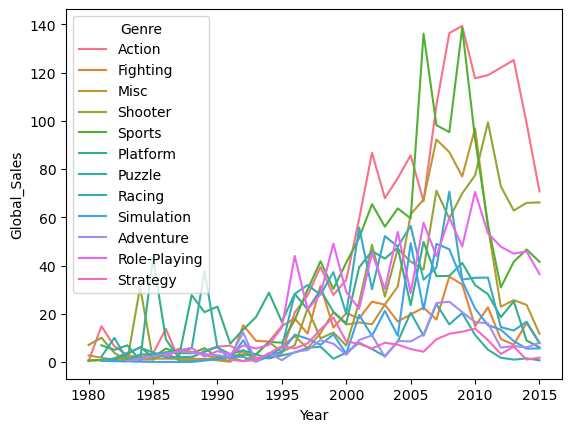

In [81]:
sns.lineplot(data=df2, x = "Year", y = "Global_Sales", hue = "Genre")

In [82]:
dfna_sales = sales_data_clean.groupby(["Year", "Genre"]).NA_Sales.sum().reset_index()

dfna_sales.describe

<bound method NDFrame.describe of      Year         Genre  NA_Sales
0    1980        Action      0.32
1    1980      Fighting      0.72
2    1980          Misc      2.53
3    1980       Shooter      6.56
4    1980        Sports      0.46
..    ...           ...       ...
370  2015  Role-Playing     13.35
371  2015       Shooter     30.79
372  2015    Simulation      1.13
373  2015        Sports     18.46
374  2015      Strategy      0.57

[375 rows x 3 columns]>

<Axes: xlabel='Year', ylabel='NA_Sales'>

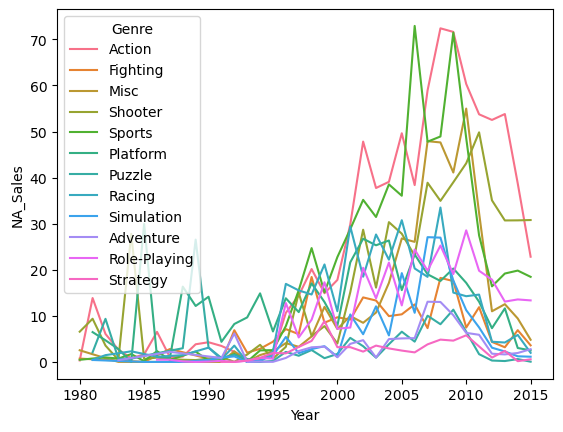

In [83]:
sns.lineplot(data=dfna_sales, x = "Year", y = "NA_Sales", hue = "Genre")

In [84]:
dfeu_sales = sales_data_clean.groupby(["Year", "Genre"]).EU_Sales.sum().reset_index()

dfeu_sales.describe

<bound method NDFrame.describe of      Year         Genre  EU_Sales
0    1980        Action      0.02
1    1980      Fighting      0.04
2    1980          Misc      0.15
3    1980       Shooter      0.43
4    1980        Sports      0.03
..    ...           ...       ...
370  2015  Role-Playing     12.52
371  2015       Shooter     24.23
372  2015    Simulation      2.51
373  2015        Sports     16.69
374  2015      Strategy      0.98

[375 rows x 3 columns]>

<Axes: xlabel='Year', ylabel='EU_Sales'>

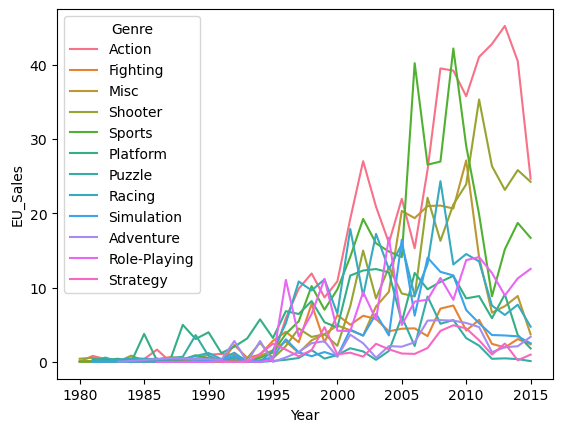

In [85]:
sns.lineplot(data=dfeu_sales, x = "Year", y = "EU_Sales", hue = "Genre")

In [86]:
dfjp_sales = sales_data_clean.groupby(["Year", "Genre"]).JP_Sales.sum().reset_index()

dfjp_sales.describe

<bound method NDFrame.describe of      Year         Genre  JP_Sales
0    1980        Action      0.00
1    1980      Fighting      0.00
2    1980          Misc      0.00
3    1980       Shooter      0.00
4    1980        Sports      0.00
..    ...           ...       ...
370  2015  Role-Playing      6.71
371  2015       Shooter      2.69
372  2015    Simulation      1.58
373  2015        Sports      0.72
374  2015      Strategy      0.15

[375 rows x 3 columns]>

<Axes: xlabel='Year', ylabel='JP_Sales'>

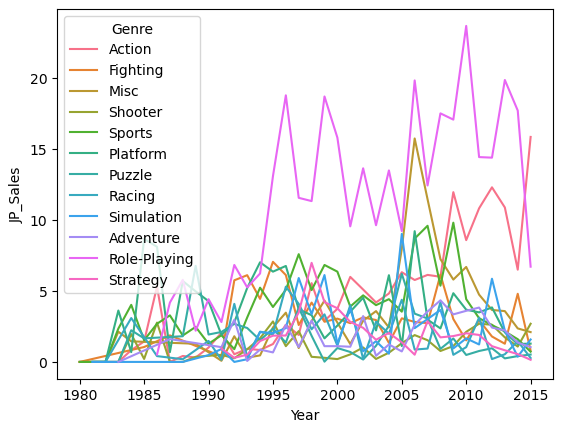

In [87]:
sns.lineplot(data=dfjp_sales, x = "Year", y = "JP_Sales", hue = "Genre")

In [88]:
dfother_sales = sales_data_clean.groupby(["Year", "Genre"]).Other_Sales.sum().reset_index()

dfother_sales.describe

<bound method NDFrame.describe of      Year         Genre  Other_Sales
0    1980        Action         0.00
1    1980      Fighting         0.01
2    1980          Misc         0.02
3    1980       Shooter         0.08
4    1980        Sports         0.01
..    ...           ...          ...
370  2015  Role-Playing         3.85
371  2015       Shooter         8.41
372  2015    Simulation         0.39
373  2015        Sports         5.62
374  2015      Strategy         0.12

[375 rows x 3 columns]>

<Axes: xlabel='Year', ylabel='Other_Sales'>

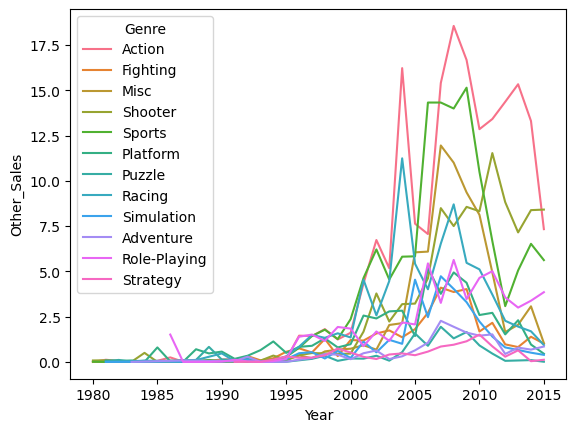

In [89]:
sns.lineplot(data=dfother_sales, x = "Year", y = "Other_Sales", hue = "Genre")

In [90]:
df2.groupby("Year").sum()

C:\Users\vneis\AppData\Local\Temp\ipykernel_15964\2203051598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("Year").sum()


,Global_Sales
Year,
1980,11.38
1981,35.77
1982,28.86
1983,16.79
1984,50.36
1985,53.94
1986,37.07
1987,21.74
1988,47.22
